# The Mnist data



#### Import the libraries

In [ ]:
import tensorflow as tf
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report



train, test = tf.keras.datasets.mnist.load_data()


x_train, y_train = train
x_test, y_test = test


# Normalize the data
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Reshape the data to include the channel dimension
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)


# Convert the labels to one-hot encoding
num_classes = 10
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)



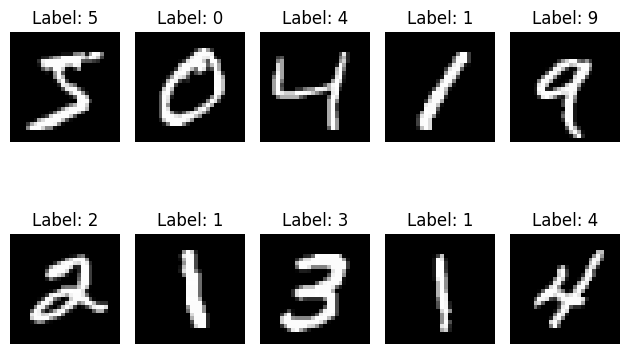

In [13]:
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
    plt.title(f'Label: {np.argmax(y_train[i])}')
plt.tight_layout()
plt.show()
    

In [14]:

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
folds = skf.split(x_train, np.argmax(y_train, axis=1))



local_data = [(x_train[train_index], y_train[train_index]) for train_index, _ in folds]

for i in local_data:
    print(i[0].shape)
    print(f'Frecuencia de etiquetas: {np.unique(np.argmax(i[1], axis=1), return_counts=True)}')
    print('===='*10)




(48000, 28, 28, 1)
Frecuencia de etiquetas: (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([4739, 5394, 4767, 4904, 4673, 4336, 4735, 5012, 4681, 4759]))
(48000, 28, 28, 1)
Frecuencia de etiquetas: (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([4738, 5393, 4767, 4905, 4674, 4337, 4734, 5012, 4681, 4759]))
(48000, 28, 28, 1)
Frecuencia de etiquetas: (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([4738, 5393, 4766, 4905, 4674, 4337, 4734, 5012, 4681, 4760]))
(48000, 28, 28, 1)
Frecuencia de etiquetas: (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([4738, 5394, 4766, 4905, 4674, 4337, 4734, 5012, 4681, 4759]))
(48000, 28, 28, 1)
Frecuencia de etiquetas: (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([4739, 5394, 4766, 4905, 4673, 4337, 4735, 5012, 4680, 4759]))


In [28]:
# Saving the data
for i, (x, y) in enumerate(local_data):
    np.save(f'../data/x_train_fold_{i}.npy', x)
    np.save(f'../data/y_train_fold_{i}.npy', y)